# live music labelling

In [64]:
import pandas as pd
from mmcv import Config
config_path = '/Users/KC/My Drive/soundmouse/cfg_setting.py'
cfg = Config.fromfile(config_path)
df = pd.read_csv(cfg.filepath_load)
df
# print(df.shape)

,id,name,artists,duration_ms,popularity,release_date,tempo,key,liveness
0,4BJqT0PrAfrxzMOxytFOIz,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...","['Sergei Rachmaninoff', 'James Levine', 'Berli...",831667,4,1921,80.954,10,0.665
1,7xPhfUan2yNtyFG0cUWkt8,Clancy Lowered the Boom,['Dennis Day'],180533,5,1921,60.936,7,0.160
2,1o6I8BglA6ylDMrIELygv1,Gati Bali,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,500062,5,1921,110.339,3,0.101
3,3ftBPsC5vPBKxYSee08FDH,Danny Boy,['Frank Parker'],210000,3,1921,100.109,5,0.381
4,4d6HGyGT8e121BsdKmw9v6,When Irish Eyes Are Smiling,['Phil Regan'],166693,2,1921,101.665,3,0.229
...,...,...,...,...,...,...,...,...,...
99994,1X3OsCYIN7uaBnorGRWMRB,Rock 'N' Roll Doctor - 2014 Remaster,['Black Sabbath'],206880,26,1976-09-25,128.828,9,0.337
99995,2Q8CXEf6tMJRgxkTXfT242,Venus And Mars / Rock Show / Jet - Live / Rema...,['Wings'],620747,32,1976-12-10,128.512,2,0.947
99996,3ZNXFs6HZa8t06Nxv7owhe,Cowboy Song,['Thin Lizzy'],318000,26,1976,133.589,8,0.265
99997,3vtyxtDrkeiayOBUcKqdhS,"Take It Easy - Live at The Forum, Los Angeles,...",['Eagles'],287533,32,1976-12-08,137.340,7,0.989


0    piano concerto no. 3 in d minor, op. 30: iii. ...
1                              clancy lowered the boom
2                                            gati bali
3                                            danny boy
Name: name, dtype: object

In [68]:
df = detect_live_in_name(df)
df.head()

<ipython-input-55-e8d41a99b013>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['live'][i] = 1


,id,name,artists,duration_ms,popularity,release_date,tempo,key,liveness,live
0,4BJqT0PrAfrxzMOxytFOIz,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...","['Sergei Rachmaninoff', 'James Levine', 'Berli...",831667,4,1921,80.954,10,0.665,0
1,7xPhfUan2yNtyFG0cUWkt8,Clancy Lowered the Boom,['Dennis Day'],180533,5,1921,60.936,7,0.160,0
2,1o6I8BglA6ylDMrIELygv1,Gati Bali,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,500062,5,1921,110.339,3,0.101,0
3,3ftBPsC5vPBKxYSee08FDH,Danny Boy,['Frank Parker'],210000,3,1921,100.109,5,0.381,0
4,4d6HGyGT8e121BsdKmw9v6,When Irish Eyes Are Smiling,['Phil Regan'],166693,2,1921,101.665,3,0.229,0


In [70]:

print(df['live'].sum())
test=df.loc[(df['live']>0) & (df['liveness']<0.3)]
print(type(test))
print(test)

35
<class 'pandas.core.frame.DataFrame'>
                          id                              name  \
770   3194gT5ute5xvd87SGZlPG        Hottentot Potentate - Live   
1014  56EWLK7IzCDywaEyXt5rtX                All My Life - Live   
1028  1ADOlp2CnR3TpNpg7DBQp0                 Reefer Man - Live   
1033  4FPaZIoUEKu4N49mGYNW0a     Doin' The New Low Down - Live   
1072  0Zop3YbzZNaAVookI0R2gt    Lose The Blackout Blues - Live   
1138  1QxCkn83XrQnUnY6WYR0SA           Shake Your Ashes - Live   
1157  1ca1yB1MnJOJWfcfrEUoK3           Wherever You Are - Live   
1194  29MI9WhSTgxisWhiO3Aymr             From Monday On - Live   
1720  0JG990zHtPPPplf9Rrzf7P  Stop and Listen Blues # 2 - Live   
2255  1QjmxwdvxgviVUEagqGhoj   Someone to Watch Over Me - Live   
2258  46K0zABkHVevaEJuw9vDoE       I Know That You Know - Live   
2380  5s93HvSRL9r6zdYAKITk6X      Swing, Brother, Swing - Live   
2384  12TDl1rlyqobXo8n2LEr0j        I Can't Get Started - Live   

                                  

id              5GUQeC4Yp5G89gxfRPJB4G
name               Long Live Love Life
artists            ['Hykoski Studios']
duration_ms                     136800
popularity                           0
release_date                1923-03-25
tempo                          100.003
key                                  1
liveness                         0.105
live                                 1
Name: 381, dtype: object

In [9]:
from utils import *
sp = spotify_api(cfg)

In [25]:
track_id = '1aIcPHRxqEgQWS7diagkF5'
res = sp.audio_features(track_id)
track= sp.track(track_id)
print('\nname: ',track['name'])


print('\nsample: ', track['preview_url'])
# print out a example of the audio_feature function
print('\naudio feature',res)


name:  April In Paris - Original Edited Concert - Live at Sunset School, Carmel-by-the-Sea, CA, September 1955

sample:  https://p.scdn.co/mp3-preview/b01f89a89c9823936f36312a9ae992350f0ecf92?cid=f0967aa1c7064a36856282c85b3644a4

audio feature [{'danceability': 0.377, 'energy': 0.185, 'key': 6, 'loudness': -21.808, 'mode': 1, 'speechiness': 0.0334, 'acousticness': 0.98, 'instrumentalness': 0.92, 'liveness': 0.926, 'valence': 0.0387, 'tempo': 101.696, 'type': 'audio_features', 'id': '1aIcPHRxqEgQWS7diagkF5', 'uri': 'spotify:track:1aIcPHRxqEgQWS7diagkF5', 'track_href': 'https://api.spotify.com/v1/tracks/1aIcPHRxqEgQWS7diagkF5', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/1aIcPHRxqEgQWS7diagkF5', 'duration_ms': 296133, 'time_signature': 4}]


In [4]:
audio_feats = create_data(cfg, sp, df)
audio_feats.head(5)

100%|██████████| 1000/1000 [03:13<00:00,  5.18it/s]


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,uri,track_href,analysis_url,duration_ms,time_signature,popularity,release_date,artists,sample_30s,name
0,0.279,0.211,10,-20.096,1,0.0366,0.982,0.878000,0.665,0.0594,...,spotify:track:4BJqT0PrAfrxzMOxytFOIz,https://api.spotify.com/v1/tracks/4BJqT0PrAfrx...,https://api.spotify.com/v1/audio-analysis/4BJq...,831667,4,NaN,NaN,NaN,https://p.scdn.co/mp3-preview/8135db88d35b4259...,"Piano Concerto No. 3 in D Minor, Op. 30: III. ..."
1,0.819,0.341,7,-12.441,1,0.4150,0.732,0.000000,0.160,0.9630,...,spotify:track:7xPhfUan2yNtyFG0cUWkt8,https://api.spotify.com/v1/tracks/7xPhfUan2yNt...,https://api.spotify.com/v1/audio-analysis/7xPh...,180533,4,NaN,NaN,NaN,https://p.scdn.co/mp3-preview/1c2685aeb6a86b8c...,Clancy Lowered the Boom
2,0.328,0.166,3,-14.850,1,0.0339,0.961,0.913000,0.101,0.0394,...,spotify:track:1o6I8BglA6ylDMrIELygv1,https://api.spotify.com/v1/tracks/1o6I8BglA6yl...,https://api.spotify.com/v1/audio-analysis/1o6I...,500062,4,NaN,NaN,NaN,https://p.scdn.co/mp3-preview/8ed8bf674327ac74...,Gati Bali
3,0.275,0.309,5,-9.316,1,0.0354,0.967,0.000028,0.381,0.1650,...,spotify:track:3ftBPsC5vPBKxYSee08FDH,https://api.spotify.com/v1/tracks/3ftBPsC5vPBK...,https://api.spotify.com/v1/audio-analysis/3ftB...,210000,3,NaN,NaN,NaN,https://p.scdn.co/mp3-preview/c5617130dea97ff1...,Danny Boy
4,0.418,0.193,3,-10.096,1,0.0380,0.957,0.000002,0.229,0.2530,...,spotify:track:4d6HGyGT8e121BsdKmw9v6,https://api.spotify.com/v1/tracks/4d6HGyGT8e12...,https://api.spotify.com/v1/audio-analysis/4d6H...,166693,4,NaN,NaN,NaN,https://p.scdn.co/mp3-preview/442df757c5852620...,When Irish Eyes Are Smiling


In [7]:
audio_feats['key'] = audio_feats['key'].astype('float64')
audio_feats.dtypes

danceability        float64
energy              float64
key                 float64
loudness            float64
mode                 object
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
type                 object
id                   object
uri                  object
track_href           object
analysis_url         object
duration_ms          object
time_signature       object
popularity          float64
release_date        float64
artists             float64
sample_30s           object
name                 object
dtype: object

In [8]:
write_df(audio_feats, cfg)

file created at  /Users/KC/My Drive/soundmouse/data/audio_feats.csv


In [99]:
selected_cols = cfg.selected_cols
audio_fts = audio_feats[selected_cols]
audio_fts.head(5)

100%|██████████| 2000/2000 [06:32<00:00,  5.10it/s]


file created at  /Users/KC/My Drive/soundmouse/data/audio_feats.csv


In [90]:
#data preparation and preprocessiong                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
print('is there null value?:\n', audio_fts.isna().sum()) # check null values

is there null value?:
 name                0
danceability        0
energy              0
key                 0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
dtype: int64


In [129]:
data_only = audio_fts.drop(columns=['name'], axis=1)
data_only = normalisation(data_only,opt_min_max=True)
data_only.head(4)
# print(data_only.shape)


,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.298715,0.221362,0.909091,0.520034,0.037849,0.985943,0.884189,0.673798,0.060612,0.376851
1,0.876874,0.358893,0.636364,0.719207,0.429162,0.734922,0.0,0.138954,0.982653,0.283665
2,0.351178,0.173755,0.272727,0.656528,0.035057,0.964857,0.919436,0.076467,0.040204,0.513642
3,0.294433,0.325039,0.454545,0.800515,0.036608,0.970882,0.000028,0.373014,0.168367,0.46602


In [130]:
data_only.dtypes

danceability        object
energy              object
key                 object
loudness            object
speechiness         object
acousticness        object
instrumentalness    object
liveness            object
valence             object
tempo               object
dtype: object

TypeError: No loop matching the specified signature and casting was found for ufunc svd_n_s

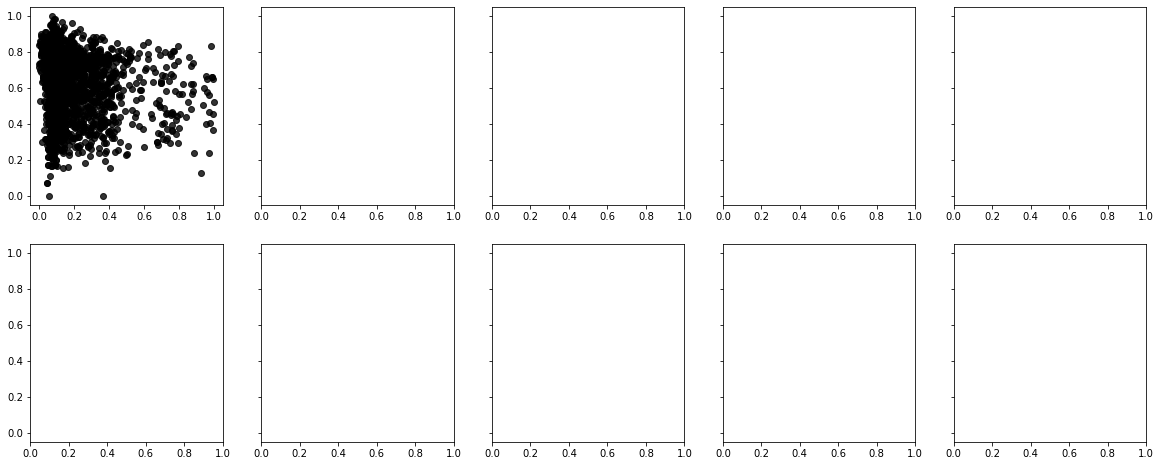

In [128]:
plot(data_only)

In [ ]:
#pca
from sklearn.decomposition import PCA

In [94]:
corr = audio_fts.corr()['liveness']
print(corr)
print(type(corr))

danceability       -0.001778
energy              0.211874
key                 0.039946
loudness            0.094944
speechiness         0.165886
acousticness        0.096236
instrumentalness   -0.242182
liveness            1.000000
valence             0.110400
tempo              -0.000173
Name: liveness, dtype: float64
<class 'pandas.core.series.Series'>


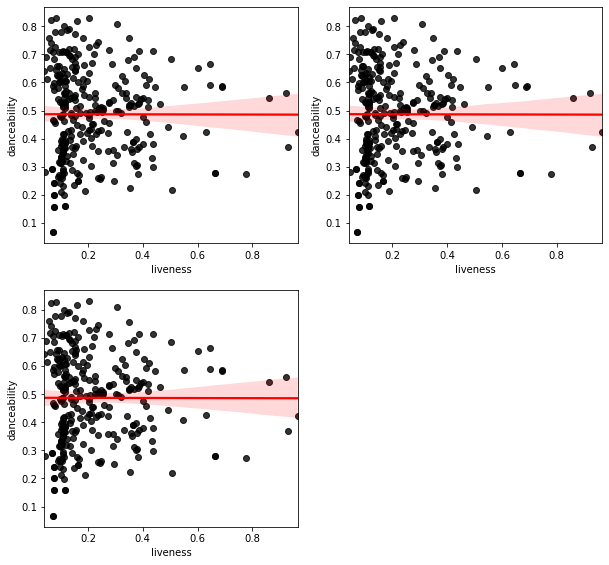

In [51]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = [10, 10]

x = audio_ft['liveness']

y = audio_ft['danceability']
# plt.figure(figsize=(20,20))
fig= plt.figure(figsize=(10, 20))
fig.add_subplot(4,2,1)
ax = sns.regplot(x=x, y=y, scatter_kws={"color": "black"}, line_kws={"color": "red"})
fig.add_subplot(4,2,2)
ax = sns.regplot(x=x, y=y, scatter_kws={"color": "black"}, line_kws={"color": "red"})
fig.add_subplot(4,2,3)
ax = sns.regplot(x=x, y=y, scatter_kws={"color": "black"}, line_kws={"color": "red"})

plt.show()


